# Coursework project 

## (Data ('project.csv') has been made in R ready to use)

## SQL (connecting, creating database)

In [1]:
# ======= connencting to database ========
import sqlite3
import os
import pandas as pd

In [2]:
# ==== change to the directory where the files are stored ====
os.chdir("/Users/alida/Documents")

In [3]:
try:
    os.remove('coursework.db')
except OSError:
    pass

In [4]:
conn = sqlite3.connect('coursework.db')

In [5]:
# ======= creating tables =======
airports = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
planes = pd.read_csv("plane-data.csv")
project = pd.read_csv("project.csv")

airports.to_sql('airports', con = conn, index = False)
carriers.to_sql('carriers', con = conn, index = False)
planes.to_sql('planes', con = conn, index = False)
project.to_sql('project', con = conn, index = False)

300000

In [6]:
# ====== manipulate databases ========
c = conn.cursor()

In [7]:
# ============
c.execute('''
          SELECT name
          FROM sqlite_master
          WHERE type='table'
          ''')
c.fetchall()


[('airports',), ('carriers',), ('planes',), ('project',)]

## Question 1

### Q1A

In [8]:
# ======== Q1A ===========
Q1A = c.execute('''
SELECT DepTime AS DepTime, AVG(project.DepDelay) AS avg_delay
FROM project
WHERE project.Cancelled = 0 AND project.Diverted = 0 AND project.DepDelay > 0
GROUP BY DepTime
ORDER BY avg_delay
''')

conn.commit()

c.fetchall()

Q1A = pd.read_sql('''
SELECT DepTime AS DepTime, AVG(project.DepDelay) AS avg_delay
FROM project
WHERE project.Cancelled = 0 AND project.Diverted = 0 AND project.DepDelay > 0
GROUP BY DepTime
ORDER BY avg_delay
''', conn)

print(Q1A)

      DepTime    avg_delay
0       531.0     1.454545
1       601.0     1.496241
2       502.0     2.000000
3       512.0     2.000000
4       517.0     2.000000
...       ...          ...
1331    300.0   405.000000
1332    320.0   412.500000
1333    249.0   449.000000
1334    145.0   690.000000
1335    452.0  1359.000000

[1336 rows x 2 columns]


In [9]:
# create a part of day column\n",
import numpy as np

conditions = [(Q1A['DepTime'] <= 600),
                (Q1A['DepTime'] <= 1200) & (Q1A['DepTime'] > 600),
                (Q1A['DepTime'] <= 1800) & (Q1A['DepTime'] > 1200),
                (Q1A['DepTime'] <= 2400) & (Q1A['DepTime'] > 1800),
                (Q1A['DepTime'] <= 2800) & (Q1A['DepTime'] > 2400)]

values = ['Night', 'Morning', 'Afternoon', 'Evening', 'Night']

Q1A['PartOfDay'] = np.select(conditions, values)
Q1A.head()

,DepTime,avg_delay,PartOfDay
0,531.0,1.454545,Night
1,601.0,1.496241,Morning
2,502.0,2.000000,Night
3,512.0,2.000000,Night
4,517.0,2.000000,Night


(0.0, 100.0)

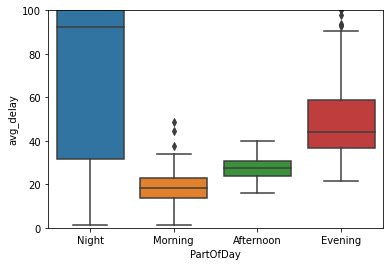

In [10]:
# ===== boxplot of Q1A ======

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x = Q1A['PartOfDay'], y = Q1A['avg_delay'])
plt.ylim([0, 100])

### Q1B

In [11]:
# ========= Q1B =================
Q1B = c.execute('''
SELECT DayOfWeek AS Day, AVG(project.DepDelay) AS avg_delay
FROM project
WHERE project.Cancelled = 0 AND project.Diverted = 0 AND project.DepDelay > 0
GROUP BY DayOfWeek
ORDER BY avg_delay
''')

conn.commit()

c.fetchall()

Q1B = pd.read_sql('''
SELECT DayOfWeek AS Day, AVG(project.DepDelay) AS avg_delay
FROM project
WHERE project.Cancelled = 0 AND project.Diverted = 0 AND project.DepDelay > 0
GROUP BY DayOfWeek
ORDER BY avg_delay
''', conn)

print(Q1B)

   Day  avg_delay
0    6  27.378710
1    2  28.925619
2    7  30.633071
3    1  30.772063
4    3  31.359622
5    5  31.901358
6    4  32.352756


Text(0, 0.5, 'Avegare delay in minutes')

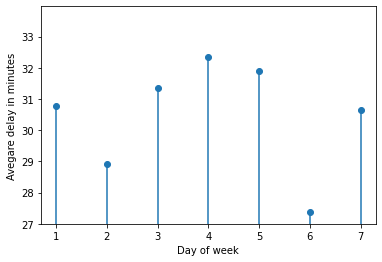

In [12]:
# ===== lollipop chart of Q1B ======
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots()

axes.stem(Q1B['Day'], Q1B['avg_delay'], use_line_collection=True)
axes.set_ylim(27)

plt.xlabel('Day of week')
plt.ylabel('Avegare delay in minutes')

### Q1C

In [13]:
# ======= Q1C =============
c.execute('''
SELECT Month AS Month, AVG(project.DepDelay) AS avg_delay
FROM project
WHERE project.Cancelled = 0 AND project.Diverted = 0 AND project.DepDelay > 0
GROUP BY Month
ORDER BY avg_delay
''')

conn.commit()

c.fetchall()

Q1C = pd.read_sql('''
SELECT Month AS Month, AVG(project.DepDelay) AS avg_delay
FROM project
WHERE project.Cancelled = 0 AND project.Diverted = 0 AND project.DepDelay > 0
GROUP BY Month
ORDER BY avg_delay
''', conn)

print(Q1C)

    Month  avg_delay
0      11  27.298564
1       9  27.800076
2       4  27.832324
3       5  28.446284
4       2  29.779953
5      10  29.794844
6       3  29.817585
7       1  30.334964
8       8  31.549586
9      12  33.025184
10      6  33.635219
11      7  34.821017


Text(0, 0.5, 'Avegare delay in minutes')

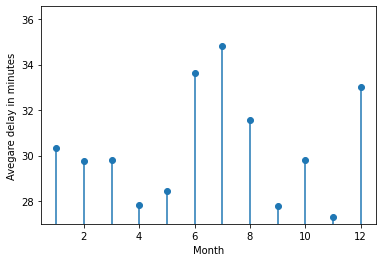

In [14]:
# ======= lollipop chart of Q1C =======
fig, axes = plt.subplots()

axes.stem(Q1C['Month'], Q1C['avg_delay'], use_line_collection=True)
axes.set_ylim(27)

plt.xlabel('Month')
plt.ylabel('Avegare delay in minutes')  

## Question 2

In [15]:
# ========= Q2 ==============

Q2 = ('''
SELECT planes.year AS year, AVG(project.DepDelay) AS delay
FROM planes JOIN project USING (tailnum)
WHERE project.Cancelled = 0 AND project.Diverted = 0 AND project.DepDelay > 0 AND planes.year >= 1956
GROUP BY planes.year
ORDER BY planes.year
''')

conn.commit()

c.fetchall()

Q2 = pd.read_sql('''
SELECT planes.year AS year, AVG(project.DepDelay) AS delay
FROM planes JOIN project USING (tailnum)
WHERE project.Cancelled = 0 AND project.Diverted = 0 AND project.DepDelay > 0 AND planes.year >= 1956
GROUP BY planes.year
ORDER BY planes.year
''', conn)

print(Q2)

    year      delay
0   1956  17.333333
1   1957  21.666667
2   1959  44.175000
3   1962  36.047619
4   1963  13.384615
5   1964  37.400000
6   1965  29.071429
7   1966  33.444444
8   1967  34.907258
9   1968  33.839827
10  1969  32.710145
11  1970  22.882353
12  1971  21.894737
13  1972   6.333333
14  1973  26.928571
15  1974  41.360000
16  1975  40.042553
17  1976  35.834171
18  1977  31.669903
19  1978  27.398844
20  1979  31.128755
21  1980  27.611111
22  1982  33.337349
23  1983  31.752727
24  1984  27.976783
25  1985  26.985343
26  1986  28.740493
27  1987  30.228276
28  1988  30.326935
29  1989  27.722845
30  1990  28.668633
31  1991  31.277029
32  1992  31.744353
33  1993  28.902562
34  1994  30.657799
35  1995  28.403883
36  1996  28.864003
37  1997  34.762814
38  1998  31.001099
39  1999  32.041439
40  2000  30.797099
41  2001  30.570878
42  2002  31.934246
43  2003  32.923935
44  2004  31.468299
45  2005  30.926547
46  2006  30.183070
47  2007  24.300826
48  None  34.581129


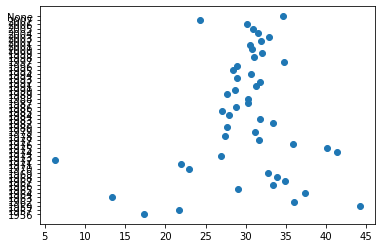

In [16]:
# ======= scatter plot of Q2 ===========
plt.scatter(Q2['delay'], Q2['year'])

## Question 3 

In [17]:
# ========= Q3 ==============

Q31 = ('''
SELECT airports.city AS city, COUNT(*) AS total
FROM airports JOIN project ON project.Origin = airports.iata
WHERE project.Year = 2005 AND project.Cancelled = 0 AND project.Diverted = 0
GROUP BY airports.city
ORDER BY total DESC
LIMIT 10
''')

conn.commit()

c.fetchall()

Q31 = pd.read_sql('''
SELECT airports.city AS city, COUNT(*) AS total
FROM airports JOIN project ON project.Origin = airports.iata
WHERE project.Year = 2005 AND project.Cancelled = 0 AND project.Diverted = 0
GROUP BY airports.city
ORDER BY total DESC
LIMIT 10
''', conn)

print(Q31)

                city  total
0            Chicago   5934
1            Atlanta   5812
2  Dallas-Fort Worth   4358
3            Houston   3661
4        Los Angeles   3225
5           New York   3097
6          Covington   2872
7             Denver   2539
8            Phoenix   2416
9          Las Vegas   2338


In [18]:
Q32 = ('''
SELECT airports.city AS city, COUNT(*) AS total
FROM airports JOIN project ON project.Origin = airports.iata
WHERE project.Year = 2006 AND project.Cancelled = 0 AND project.Diverted = 0
GROUP BY airports.city
ORDER BY total DESC
LIMIT 10
''')

conn.commit()

c.fetchall()

Q32 = pd.read_sql('''
SELECT airports.city AS city, COUNT(*) AS total
FROM airports JOIN project ON project.Origin = airports.iata
WHERE project.Year = 2006 AND project.Cancelled = 0 AND project.Diverted = 0
GROUP BY airports.city
ORDER BY total DESC
LIMIT 10
''', conn)

print(Q32)

                city  total
0            Chicago   6375
1            Atlanta   5659
2  Dallas-Fort Worth   4144
3            Houston   3874
4           New York   3273
5        Los Angeles   3259
6             Denver   3198
7            Phoenix   3015
8          Las Vegas   2480
9             Newark   2097


In [19]:
Q33 = ('''
SELECT airports.city AS city, COUNT(*) AS total
FROM airports JOIN project ON project.Origin = airports.iata
WHERE project.Year = 2007 AND project.Cancelled = 0 AND project.Diverted = 0
GROUP BY airports.city
ORDER BY total DESC
LIMIT 10
''')

conn.commit()

c.fetchall()

Q33 = pd.read_sql('''
SELECT airports.city AS city, COUNT(*) AS total
FROM airports JOIN project ON project.Origin = airports.iata
WHERE project.Year = 2007 AND project.Cancelled = 0 AND project.Diverted = 0
GROUP BY airports.city
ORDER BY total DESC
LIMIT 10
''', conn)

print(Q33)

                city  total
0            Chicago   6110
1            Atlanta   5390
2  Dallas-Fort Worth   3774
3            Houston   3325
4             Denver   3226
5           New York   3154
6        Los Angeles   2995
7            Phoenix   2804
8          Las Vegas   2473
9            Detroit   2272


<AxesSubplot:xlabel='total', ylabel='city'>

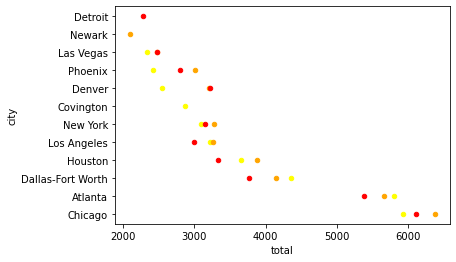

In [20]:
# =============== plotting Q3 =================

ax = plt.subplot(111)

Q31.plot(kind = 'scatter', x = 'total', y = 'city', c ='yellow', ax = ax)
Q32.plot(kind = 'scatter', x = 'total', y = 'city', c = 'orange', ax = ax)
Q33.plot(kind = 'scatter', x = 'total', y = 'city', c = 'red', ax = ax)

## Question 4 

In [21]:
# =========== Q4 ==============
Q41 = ('''
SELECT project.Origin AS Origin, airports.airport AS Airport, COUNT(*) AS Total 
FROM project JOIN airports ON project.Origin = airports.iata
WHERE LateAircraftDelay > 0 AND Cancelled = 0 AND ArrDelay > 0 AND DepDelay > 0 
GROUP BY Origin
ORDER BY Total DESC
LIMIT 10
''')

conn.commit()

c.fetchall()

Q41 = pd.read_sql('''
SELECT project.Origin AS Origin, airports.airport AS Airport, COUNT(*) AS Total 
FROM project JOIN airports ON project.Origin = airports.iata
WHERE LateAircraftDelay > 0 AND Cancelled = 0 AND ArrDelay > 0 AND DepDelay > 0 
GROUP BY Origin
ORDER BY Total DESC
LIMIT 10
''', conn)

print(Q41)

  Origin                            Airport  Total
0    ORD       Chicago O'Hare International   2315
1    ATL  William B Hartsfield-Atlanta Intl   1680
2    DFW    Dallas-Fort Worth International   1520
3    LAS             McCarran International   1055
4    DEN                        Denver Intl   1019
5    EWR                        Newark Intl    925
6    LAX          Los Angeles International    897
7    PHX   Phoenix Sky Harbor International    810
8    PHL                  Philadelphia Intl    683
9    LGA                          LaGuardia    634


In [22]:
Q42 = ('''
SELECT project.Dest AS Dest, airports.airport AS Airport, COUNT(*) AS Total 
FROM project JOIN airports ON project.Origin = airports.iata
WHERE LateAircraftDelay > 0 AND Cancelled = 0 AND ArrDelay > 0 AND DepDelay > 0 
GROUP BY Dest
ORDER BY Total DESC
LIMIT 10
''')

conn.commit()

c.fetchall()

Q42 = pd.read_sql('''
SELECT project.Dest AS Dest, airports.airport AS Airport, COUNT(*) AS Total 
FROM project JOIN airports ON project.Dest = airports.iata
WHERE LateAircraftDelay > 0 AND Cancelled = 0 AND ArrDelay > 0 AND DepDelay > 0 
GROUP BY Dest
ORDER BY Total DESC
LIMIT 10
''', conn)

print(Q42)

  Dest                            Airport  Total
0  ORD       Chicago O'Hare International   1780
1  DFW    Dallas-Fort Worth International   1315
2  ATL  William B Hartsfield-Atlanta Intl   1295
3  LAS             McCarran International    958
4  LAX          Los Angeles International    914
5  DEN                        Denver Intl    816
6  PHX   Phoenix Sky Harbor International    807
7  IAH       George Bush Intercontinental    670
8  EWR                        Newark Intl    618
9  SEA                Seattle-Tacoma Intl    606


<AxesSubplot:xlabel='Total', ylabel='Airport'>

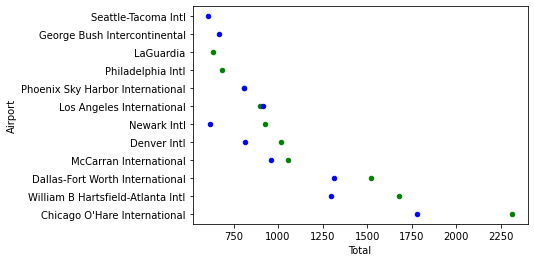

In [23]:
# =============== plotting Q4 =================

ax = plt.subplot(111)

Q41.plot(kind = 'scatter', x = 'Total', y = 'Airport', c ='green', ax = ax)
Q42.plot(kind = 'scatter', x = 'Total', y = 'Airport', c = 'blue', ax = ax)

### Digging deeper in Q4 (see comment in pdf)

In [24]:
june = pd.read_csv("june.csv")
june.to_sql('june', con = conn, index = False)

609195

In [25]:
Q4J = ('''
SELECT TailNUm, COUNT (*) AS T, Origin, Dest, DepTime, DayOfMonth
FROM June
WHERE LateAircraftDelay > 0 AND Cancelled = 0 AND ArrDelay > 0 AND DepDelay > 0 AND Origin = 'ORD'
GROUP BY TailNum
''') 

conn.commit()

c.fetchall()

Q4J = pd.read_sql('''
SELECT TailNUm, COUNT (*) AS T, Origin, Dest, DepTime, DayOfMonth
FROM June
WHERE LateAircraftDelay > 0 AND Cancelled = 0 AND ArrDelay > 0 AND DepDelay > 0 AND Origin = 'ORD'
GROUP BY TailNum
''', conn) 
                  
print(Q4J)

     TailNum  T Origin Dest  DepTime  DayofMonth
0     N11106  1    ORD  CLE   2112.0          10
1     N11127  1    ORD  CLE   1822.0          26
2     N11140  1    ORD  CLE   2105.0          19
3     N11547  1    ORD  CLE   1740.0          30
4     N11612  2    ORD  IAH   1300.0          30
...      ... ..    ...  ...      ...         ...
1256  N989DL  1    ORD  ATL   1208.0           3
1257  N990DL  1    ORD  ATL   1927.0           7
1258  N992DL  1    ORD  ATL   1946.0           4
1259  N993DL  1    ORD  ATL   1940.0          10
1260  N995DL  1    ORD  ATL   1937.0          15

[1261 rows x 6 columns]


In [26]:
Q4J1 = ('''
SELECT TailNUm, Origin, Dest, DepTime, DayOfMonth
FROM June
WHERE LateAircraftDelay > 0 AND Cancelled = 0 AND ArrDelay > 0 AND DepDelay > 0
AND Tailnum = 'N518AE' AND DayOfMonth = 30
GROUP BY DepTime
''') 

conn.commit()

c.fetchall()

Q4J1 = pd.read_sql('''
SELECT TailNUm, Origin, Dest, DepTime, DayOfMonth
FROM June
WHERE LateAircraftDelay > 0 AND Cancelled = 0 AND ArrDelay > 0 AND DepDelay > 0
AND Tailnum = 'N518AE' AND DayOfMonth = 30
GROUP BY DepTime
''', conn) 
                  
print(Q4J1)

  TailNum Origin Dest  DepTime  DayofMonth
0  N518AE    ORD  BNA    858.0          30
1  N518AE    BNA  ORD   1134.0          30
2  N518AE    ORD  SDF   1450.0          30
3  N518AE    SDF  ORD   1743.0          30
4  N518AE    ORD  DSM   1850.0          30
5  N518AE    DSM  ORD   2013.0          30
6  N518AE    ORD  BUF   2152.0          30


In [27]:
conn.close()

## Question 5

In [28]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml  #using openml to import data
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer #transform different types

In [29]:
project = pd.read_csv("C:\\Users\\alida\\Documents\\project.csv")
project.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [30]:
project['TARGET'] = np.where(project['ArrDelay'] > 0, 1, 0)
project.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TARGET
0,2005,12,25,7,639.0,610,858.0,820,FL,229,...,8,0,NaN,0,29,0,9,0,0,1
1,2005,9,30,5,1240.0,1240,1402.0,1350,WN,2317,...,18,0,NaN,0,0,0,0,0,0,1
2,2005,12,28,3,1450.0,1453,1629.0,1628,MQ,4675,...,16,0,NaN,0,0,0,0,0,0,1
3,2005,9,16,5,2048.0,1955,2204.0,2126,DL,1101,...,11,0,NaN,0,0,0,0,0,38,1
4,2005,6,8,3,1412.0,1418,1920.0,1946,NW,320,...,11,0,NaN,0,0,0,0,0,0,0


In [31]:
project.Year.unique()

array([2005, 2006, 2007], dtype=int64)

In [32]:
df = project[[ 'DepTime', 'DepDelay', 'Year', 'TARGET']]

In [33]:
df.dropna(axis=0, inplace =True)

C:\Users\alida\AppData\Local\Temp\ipykernel_1656\4050697816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace =True)


In [34]:
df.isna().sum()

DepTime     0
DepDelay    0
Year        0
TARGET      0
dtype: int64

In [35]:
x = df[[ 'DepTime', 'DepDelay']]

In [36]:
y = df.TARGET

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [38]:
y_train

287777    1
102938    0
75773     0
87812     1
28765     0
         ..
219250    1
206383    1
104841    0
51437     1
278072    1
Name: TARGET, Length: 220590, dtype: int32

In [39]:
y_test

243643    0
180215    1
186867    1
193017    1
146834    1
         ..
137777    0
280363    1
138267    0
158096    1
45143     0
Name: TARGET, Length: 73531, dtype: int32

In [40]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 1, 0])

## ROC curve and AUC

C:\Users\alida\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


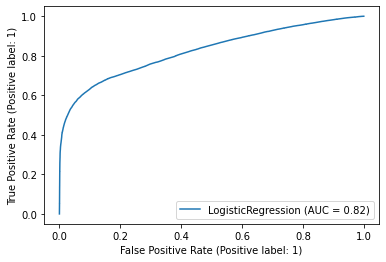

In [42]:
plot_roc_curve(model, x_test, y_test)